In [362]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTTGeqeDbdkJF0Hun5SpWK8oYWXHh9XMoCHlLsDfq9H0lqxk1N1sgRpYlKE3cGrrXWGaMU5glkJgBhj/pub?output=csv'
teste = pd.read_csv(url)
teste

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


### 1. Substituir o cabeçalho por palavras em letras maiúsculas:

In [363]:
teste.columns = teste.columns.str.upper()
teste.columns

Index(['ID', 'PONTOS', 'ESTADO', 'GENERO', 'IDADE', 'BENS', 'SALDO NA CONTA',
       'PRODUTO', 'POSSUI CARTAO', 'ATIVO', 'SALARIO', 'SAIU'],
      dtype='object')

### 2. Corrigir os dados faltantes e preencher as lacunas com valores adequados:

In [364]:
teste.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            8
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64

Pode-se observar que só existem valores nulos nas colunas GENERO e SALARIO. Assim, serão tratados com as atribuições dos valore "Não Registrado", para o caso da coluna GENERO, e a média salarial, para a coluna SALARIO.

In [365]:
teste['GENERO'].fillna('Não Registrado', inplace=True)
teste['SALARIO'].fillna(teste['SALARIO'].mean(), inplace=True)
teste.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64

### 3. Eliminar os outliers, atribuindo no lugar deles os valores adequados

ID                   Axes(0.125,0.712609;0.133621x0.167391)
PONTOS            Axes(0.285345,0.712609;0.133621x0.167391)
IDADE              Axes(0.44569,0.712609;0.133621x0.167391)
BENS              Axes(0.606034,0.712609;0.133621x0.167391)
SALDO NA CONTA    Axes(0.766379,0.712609;0.133621x0.167391)
PRODUTO              Axes(0.125,0.511739;0.133621x0.167391)
POSSUI CARTAO     Axes(0.285345,0.511739;0.133621x0.167391)
ATIVO              Axes(0.44569,0.511739;0.133621x0.167391)
SALARIO           Axes(0.606034,0.511739;0.133621x0.167391)
SAIU              Axes(0.766379,0.511739;0.133621x0.167391)
dtype: object

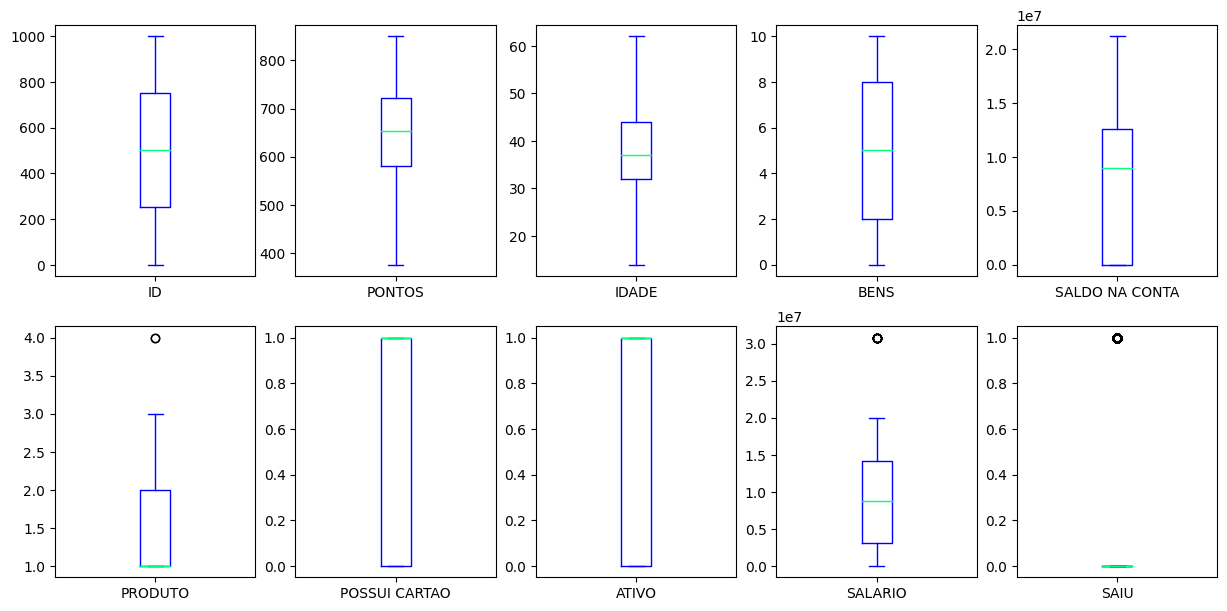

In [395]:
teste.plot(subplots=True,  layout=(4,5), figsize=(15,15), kind='box', colormap='winter')

Com base nos gráficos, é possível perceber outliers nas colunas: IDADE, PRODUTO, SALÁRIO e SAIU. Observando os casos de cada uma das colunas, é perceptível que a coluna SAIU, apesar de estar com um comportamento que indica outliers, contém apenas valores esperados. A coluna PRODUTO também passa por algo similar, com seus valores dentro do esperado, e seu outlier sendo apenas um valor com poucas instâncias. Assim, serão tratadas as colunas IDADE e SALÁRIO.

In [367]:
IQR_IDADE = teste['IDADE'].quantile(0.75) - teste['IDADE'].quantile(0.25)
max_outlier_idade = teste['IDADE'].quantile(0.75) + (IQR_IDADE * 1.5)
min_outlier_idade = teste['IDADE'].quantile(0.25) - (IQR_IDADE * 1.5)
teste.loc[teste['IDADE'] >= max_outlier_idade, 'IDADE'] = max_outlier_idade
teste.loc[teste['IDADE'] <= min_outlier_idade, 'IDADE'] = min_outlier_idade

IQR_SALARIO = teste['SALARIO'].quantile(0.75) - teste['SALARIO'].quantile(0.25)
max_outlier_salario = teste['SALARIO'].quantile(0.75) + (IQR_SALARIO * 1.5)
teste.loc[teste['SALARIO'] >= max_outlier_salario, 'SALARIO'] = max_outlier_salario

ID                   Axes(0.125,0.712609;0.133621x0.167391)
PONTOS            Axes(0.285345,0.712609;0.133621x0.167391)
IDADE              Axes(0.44569,0.712609;0.133621x0.167391)
BENS              Axes(0.606034,0.712609;0.133621x0.167391)
SALDO NA CONTA    Axes(0.766379,0.712609;0.133621x0.167391)
PRODUTO              Axes(0.125,0.511739;0.133621x0.167391)
POSSUI CARTAO     Axes(0.285345,0.511739;0.133621x0.167391)
ATIVO              Axes(0.44569,0.511739;0.133621x0.167391)
SALARIO           Axes(0.606034,0.511739;0.133621x0.167391)
SAIU              Axes(0.766379,0.511739;0.133621x0.167391)
dtype: object

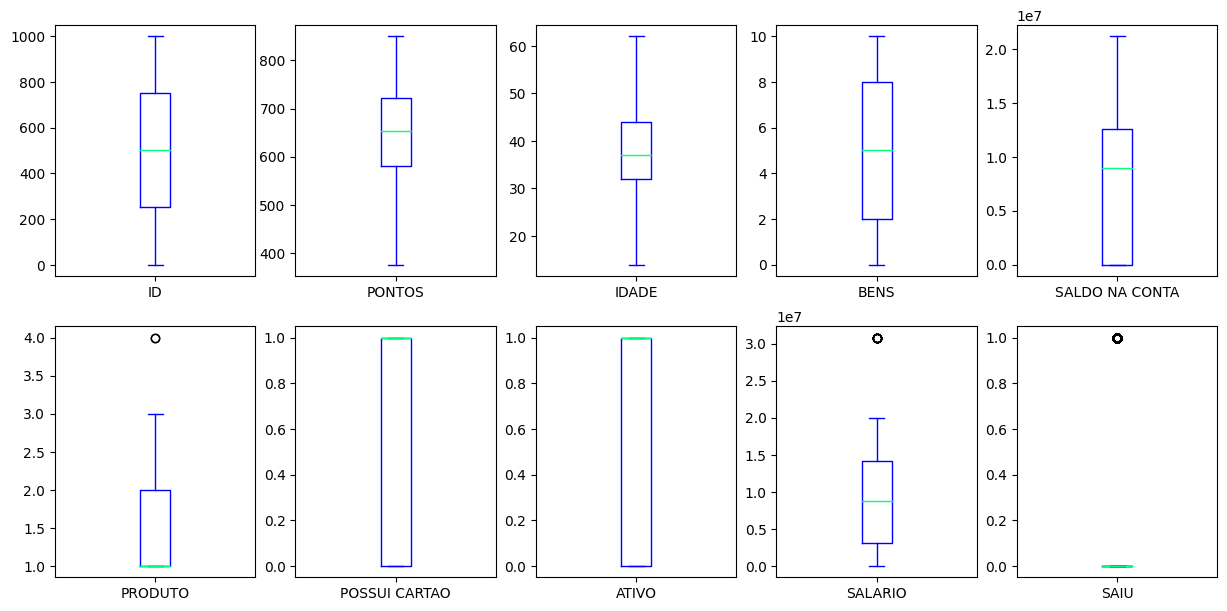

In [396]:
teste.plot(subplots=True,  layout=(4,5), figsize=(15,15), kind='box', colormap='winter')

### 4. Eliminar os duplicados, para garantir a unicidade das informações:

In [390]:
teste.drop_duplicates(inplace=True)
teste

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU,FAIXA_ETARIA
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1,Adulto
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0,Adulto
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1,Adulto
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0,Adulto
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0,Adulto
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0,Jovem
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0,Adulto
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0,Adulto


### 5. Substituir os NANs por valores adequados:

In [370]:
teste.isnull().any()

ID                False
PONTOS            False
ESTADO            False
GENERO            False
IDADE             False
BENS              False
SALDO NA CONTA    False
PRODUTO           False
POSSUI CARTAO     False
ATIVO             False
SALARIO           False
SAIU              False
dtype: bool

### 6. Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino" e "Fem" para "Feminino" para adequá-los ao padrão dos demais:

In [371]:
teste.GENERO.unique()

array(['Feminino', 'Masculino', 'M', 'Não Registrado', 'F', 'Fem'],
      dtype=object)

In [372]:
teste.loc[teste['GENERO'] == 'M', 'GENERO'] = 'Masculino'
teste.loc[teste['GENERO'] == 'F', 'GENERO'] = 'Feminino'
teste.loc[teste['GENERO'] == 'Fem', 'GENERO'] = 'Feminino'
teste.GENERO.unique()

array(['Feminino', 'Masculino', 'Não Registrado'], dtype=object)

### 7. Vá além das dicas fornecidas, para melhorar a sua habilidade em limpeza e tratamento de dados:

In [373]:
bins = [0, 18, 35, 80, np.inf]
labels = ['Adolescente', 'Jovem', 'Adulto', 'Idoso']
teste['FAIXA_ETARIA'] = pd.cut(teste['IDADE'], bins=bins, labels=labels, right=False)
teste.head()

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU,FAIXA_ETARIA
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1,Adulto
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0,Adulto
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1,Adulto
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0,Adulto
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0,Adulto


Foi criada a coluna FAIXA_ETARIA, cuja função é permitir um melhor direcionamento de serviços (adolescentes não podem fazer emprestimos) ou campanhas (adultos podem ter mais interesse em campanhas de negociações de dívidas).

### Extra:

In [383]:
teste.describe()

,ID,PONTOS,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,998.000000,998.000000,998.00000,9.980000e+02,998.000000
mean,501.337675,648.605210,38.727455,5.073146,7.162423e+06,1.526052,0.703407,0.51002,9.086632e+06,0.203407
std,288.500953,98.312117,9.909716,2.926320,6.314508e+06,0.574293,0.456985,0.50015,6.443703e+06,0.402734
min,1.000000,376.000000,14.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,252.250000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.075784e+06,0.000000
50%,501.500000,653.000000,37.000000,5.000000,8.926348e+06,1.000000,1.000000,1.00000,8.802358e+06,0.000000
75%,750.750000,721.000000,44.000000,8.000000,1.258767e+07,2.000000,1.000000,1.00000,1.412443e+07,0.000000
max,1000.000000,850.000000,62.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,3.079899e+07,1.000000


In [384]:
media_salario = teste.groupby('ESTADO')['SALARIO'].mean()

print("Média do Salário por Estado:\n")
print(media_salario)

Média do Salário por Estado:

ESTADO
BA    8.806110e+06
CE    9.262300e+06
MA    8.863564e+06
MG    1.082690e+07
RJ    1.050755e+07
SP    8.318383e+06
Name: SALARIO, dtype: float64


In [385]:
genero_num = teste.groupby('GENERO').size()

print("Número de Registros por Gênero:\n")
print(genero_num)

Número de Registros por Gênero:

GENERO
Feminino          463
Masculino         527
Não Registrado      8
dtype: int64


<ipython-input-397-870aef93204c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ESTADO', y='MEDIA_SALARIO', data=media_salario, palette='winter')


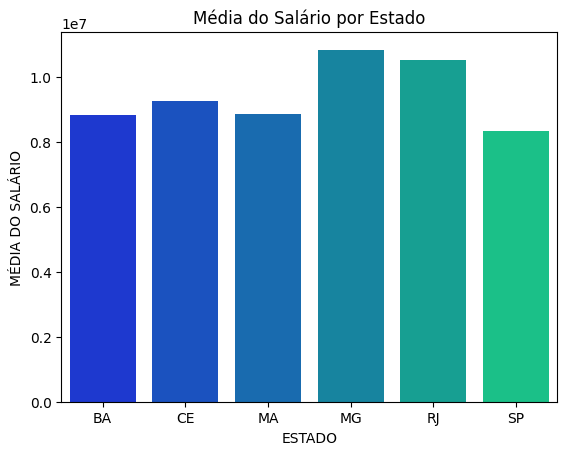

In [397]:
media_salario = teste.groupby('ESTADO')['SALARIO'].mean().reset_index(name='MEDIA_SALARIO')

sns.barplot(x='ESTADO', y='MEDIA_SALARIO', data=media_salario, palette='winter')
plt.title('Média do Salário por Estado')
plt.ylabel('MÉDIA DO SALÁRIO')
plt.show()

<ipython-input-398-c9c178efcb25>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GENERO', data=teste, palette='winter')


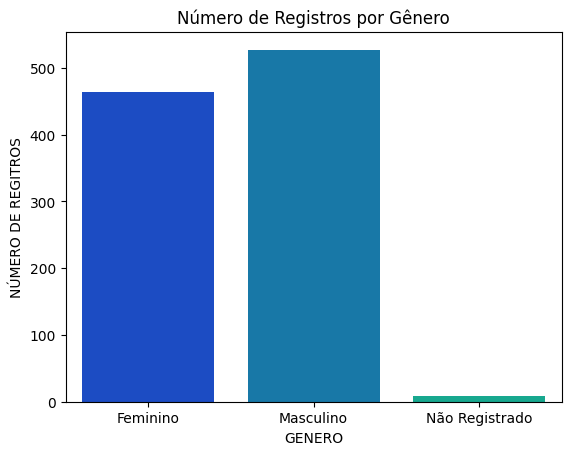

In [398]:
sns.countplot(x='GENERO', data=teste, palette='winter')
plt.title('Número de Registros por Gênero')
plt.ylabel('NÚMERO DE REGITROS')
plt.show()

In [388]:
amostra = teste.sample(frac=0.1, random_state=1)
media_salario_amostra = amostra['SALARIO'].mean()
desvio_padrao_amostra = amostra['SALARIO'].std()
n = amostra['SALARIO'].count()

erro_padrao = desvio_padrao_amostra / np.sqrt(n)
alpha = 0.05
df = n - 1
t_critical = np.percentile(np.random.standard_t(df, size=1000000), 100 * (1 - alpha / 2))
intervalo_conf = (media_salario_amostra - t_critical * erro_padrao,
                  media_salario_amostra + t_critical * erro_padrao)

print(f"Média estimada do Salário: {media_salario_amostra:.2f}")
print(f"Média do Salário: {teste['SALARIO'].mean():.2f}")
print(f"Intervalo de Confiança de 95% para a Média do Salário: {intervalo_conf[0]:.2f} a {intervalo_conf[1]:.2f}")


Média estimada do Salário: 9221530.29
Média do Salário: 9086632.28
Intervalo de Confiança de 95% para a Média do Salário: 8022641.76 a 10420418.81


In [389]:
teste

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU,FAIXA_ETARIA
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1,Adulto
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0,Adulto
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1,Adulto
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0,Adulto
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0,Adulto
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0,Jovem
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0,Adulto
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0,Adulto
